In [58]:
from twitterscraper import query_tweets
import pandas as pd
from multiprocessing import Pool
from IPython.display import display
import sys
from twitterscraper.query import query_tweets_from_user
from twitterscraper.query import query_user_info
from twitterscraper.tweet import Tweet
from twitterscraper.user import User
from twitterscraper.ts_logger import logger as ts_logger

In [59]:
import csv
import json
import argparse
import collections
import datetime as dt
from os.path import isfile
from pprint import pprint
import codecs
import requests

In [75]:
with codecs.open('immigration_immigrant_tweets_0203.json', 'r', 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

In [76]:
import pandas as pd
df = pd.read_json('only_immigration_tweets.json', encoding='utf-8')
#sort
#df.sort_values("text", inplace = True)

In [80]:
df['text'].head(100)

0     is very pleased that operation: immigrant surp...
1     Hating the Immigration and Nationality Directo...
2     has a 30 min window to get through immigration...
3     sun is rising beautifully over this london sub...
4     is very pleased that operation: immigrant surp...
                            ...                        
95    TECHNOLOGY: Video Game Lets Players Be Immigra...
96    Loads of illegal immigrants being smuggled thr...
97    Immigration fight spurs exodus http://tinyurl....
98    Immigration fight spurs exodus http://tinyurl....
99    Immigration fight spurs exodus http://tinyurl....
Name: text, Length: 100, dtype: object

In [ ]:
# Preprocessing
import preprocessor as p
import preprocessor.api as p
from preprocessor.api import clean, tokenize, parse
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import re #regular expression
from textblob import TextBlob
import string
# Define emoticons
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

#df.text = df.text.astype(str)
#df['text'].astype(str)

# Clean text using preprocessor
#clean_text = p.clean(df['text'])

# remove urls
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in df['text']]
all_tweets_no_urls[:5]

# dropping ALL duplicte values 
df_no_links.drop_duplicates(subset ="text", keep = 'first', inplace = True)

# make everything lowercase
#lower_case = [word.lower() for word in all_tweets_no_urls]

# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet

# finalized data frame with no URL
df_no_links = df.assign(text=words_in_tweet)



In [95]:
lower_case

['is very pleased that operation immigrant surprise party was a success last night',
 'hating the immigration and nationality directorate',
 'has a 30 min window to get through immigration tonight',
 'sun is rising beautifully over this london suburb yet my assigned immigration agent doesnt appreciate the fact i dont yet possess a plane ticket ho',
 'is very pleased that operation immigrant surprise party was a success last night',
 'hating the immigration and nationality directorate',
 'has a 30 min window to get through immigration tonight',
 'sun is rising beautifully over this london suburb yet my assigned immigration agent doesnt appreciate the fact i dont yet possess a plane ticket ho',
 'immigration minister arrested for locking up migrants at campsfield members of the campaign to close cam',
 'immigrant workers rally in chicago as federal hiring crackdown looms',
 'immigrant workers rally in chicago as federal hiring crackdown looms',
 'us plans workplace crackdown on illegal i

In [151]:
# Preprocessing
import preprocessor as p
import preprocessor.api as p
from preprocessor.api import clean, tokenize, parse
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import re #regular expression
from textblob import TextBlob
import string
# Define emoticons
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

#df.text = df.text.astype(str)
#df['text'].astype(str)

# Clean text using preprocessor
#clean_text = p.clean(df['text'])

# remove urls
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

all_tweets_no_urls = [remove_url(tweet) for tweet in df['text']]

# data frame with no URL
df_no_urls = df.assign(text=all_tweets_no_urls)

# dropping ALL duplicte values 
df_no_urls.drop_duplicates(subset ="text", keep = 'first', inplace = True)

tweets = df_no_urls['text']

# Create a list of lists containing lowercase segregated words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets]
words_in_tweet

# finalized data frame with no URL, segregated lowercase words
#df_final = df_no_urls.assign(text=words_in_tweet)

# remove stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

df_final = df_no_urls.assign(text=tweets_nsw)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/infusoria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
df_final

['pleased',
 'operation',
 'immigrant',
 'surprise',
 'party',
 'success',
 'last',
 'night',
 'hating',
 'immigration',
 'nationality',
 'directorate',
 '30',
 'min',
 'window',
 'get',
 'immigration',
 'tonight',
 'sun',
 'rising',
 'beautifully',
 'london',
 'suburb',
 'yet',
 'assigned',
 'immigration',
 'agent',
 'doesnt',
 'appreciate',
 'fact',
 'dont',
 'yet',
 'possess',
 'plane',
 'ticket',
 'ho',
 'immigration',
 'minister',
 'arrested',
 'locking',
 'migrants',
 'campsfield',
 'members',
 'campaign',
 'close',
 'cam',
 'immigrant',
 'workers',
 'rally',
 'chicago',
 'federal',
 'hiring',
 'crackdown',
 'looms',
 'us',
 'plans',
 'workplace',
 'crackdown',
 'illegal',
 'immigrants',
 'thats',
 'immigration',
 'lawyers',
 'phone',
 'hope',
 'waiting',
 'local',
 'immigrant',
 'resistance',
 'begins',
 'prince',
 'william',
 'county',
 'us',
 'get',
 'tougher',
 'employers',
 'illegal',
 'immigrants',
 'new',
 'effort',
 'crack',
 'illegal',
 'immigra',
 'population',
 'manche

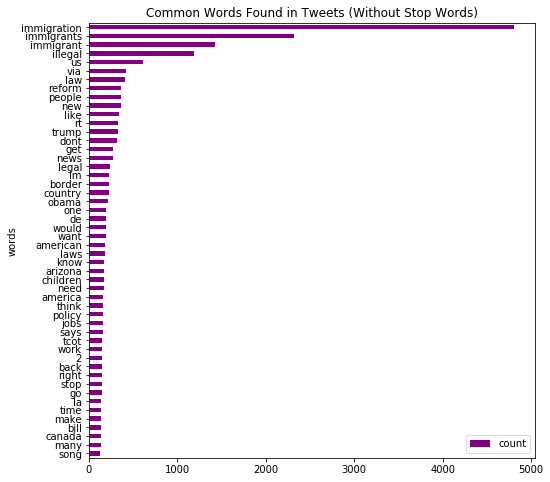

In [152]:
import itertools
import matplotlib.pyplot as plt

# List of all words across tweets
df_final = list(itertools.chain(*tweets_nsw))

# Create counter
counts_no_urls = collections.Counter(df_final)

counts_no_urls.most_common()


clean_tweets_nsw = pd.DataFrame(counts_no_urls.most_common(50),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [ ]:
#Subset dataframe
#tweets_hashtags_id = df[['text', 'hashtags', 'user_id']]
#tweets_hashtags_id.to_csv(r'final_immigration_only.csv')
#tweets_hashtags_id.head()